In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statistics
import random
import math
import warnings
import statsmodels.formula.api as sm
from scipy import stats
from scipy.stats import norm
from scipy.optimize import minimize

## Questão 1. ( $5.0$ pontos)
Considere o modelo latente a seguir:
$$
\begin{aligned}
&y_{1 i}^*=\gamma y_{2 i}+\beta_1 x_{1 i}+\beta_2 x_{2 i}+u_i \\
&y_{2 i}=\pi_1 x_{1 i}+\pi_2 x_{2 i}+\pi_3 x_{3 i}+v_i
\end{aligned}
$$
onde o econometrista observa
$$
y_{1 i}=\mathbb{I}\left(y_{1 i}^*>0\right),
$$
sendo $\mathbb{I}\left(y_{1 i}^*>0\right)$ uma função indicadora com valor igual a 1 caso $y_{1 i}^*>0$ e 0 caso contrário. As seguintes propriedades são válidas:


* $\left(u_i, v_i\right)$ tem média zero, distribuição normal, independente de $x_i=\left(x_{1 i}, x_{2 i}, x_{3 i}\right)$;

* $u_i=\lambda v_i+\eta_i$, onde $\left(v_i, \eta_i\right)$ são independentes com distribuição normal padrão.

Para o exercício de simulação abaixo, considere o seguinte processo de geração de dados: $x_{1 i}$ é um termo constante, $(x_{2 i}, x_{3 i})$ vem de distribuições normais multivariada equicorrelacionadas, com médias zeros, variancias unitárias e covariância de 0.5. Os parâmetros são definidos como:


* $\gamma=1$ 
* $\beta_1=0$
* $\beta_2=-1$
* $\pi_1=0$
* $\pi_2=1$
* $\pi_3=1$
* $\lambda = 0.5$
* $n=100$ 

onde $n$ é o tamanho da amostra. Construa o se próprio código para as stimações abaixo, não use os comandos do software.

### (a) (1.0) Proponha um método de estimação para o problema acima baseado na densidade conjunta de $f\left(y_{1 i}, y_{2 i} \mid x_i\right)$. Obtenha a função de verossimilhança para a estimação.

Sabemos que

$$
f(y_{1i}, y_{2i}|x_i) = f(y_{1i}|y_{2i}, x_i)\cdot f(y_{2i}|x_i)
$$

Então precisamos encontrar $f(y_{1i}|y_{2i}, x_i)$ e $f(y_{2i}|x_i)$. Primeiro encontraremos $f(y_{2i}|x_i)$.

Pelo enunciado, temos a seguinte estrutura entre os erros

$$
\left(\begin{array}{l}
u_i \\
v_i
\end{array}\right) \sim \operatorname{NID}\left[\left(\begin{array}{l}
0 \\
0
\end{array}\right),\left(\begin{array}{ll}
\sigma_{u}^2 & \sigma_{u v} \\
\sigma_{v u} & \sigma_{v}^2
\end{array}\right)\right]
$$

Utilizando as propriedades da normal multivariada, temos os seguintes resultados

* Distribuição marginal

$$
\mathbb{D}(u_i) = \mathcal{N}(0, \sigma_u^2)\\
\mathbb{D}(v_i) = \mathcal{N}(0, \sigma_v^2)
$$

* Distribuição Condicional
$$
\mathbb{D}(u_i | v_i) = \mathcal{N}\left(\frac{\sigma{u v}}{\sigma_v^2}v_i, \sigma_u^2 - \frac{\sigma{u v}^2}{\sigma_v^2}\right)\\
\mathbb{D}(v_i | u_i) = \mathcal{N}\left(\frac{\sigma{v u}}{\sigma_u^2}u_i, \sigma_v^2 - \frac{\sigma{v u}^2}{\sigma_u^2}\right)\\
$$


Partindo então de $y_{2 i}=\pi_1 x_{1 i}+\pi_2 x_{2 i}+\pi_3 x_{3 i}+v_i$, temos

$$
\mathbb{E}[y_{2 i}| x_i] = \pi_1 x_{1 i}+\pi_2 x_{2 i}+\pi_3 x_{3 i} \\
\mathbb{V}[y_{2 i}| x_i] = \mathbb{V}[v_i | x_i] = \mathbb{V}[v_i] =\sigma_v^2 = 1
$$

Portanto

$$
\mathbb{D}(y_{2 i}|x_i) = \mathcal{N}\left(\pi_1 x_{1 i}+\pi_2 x_{2 i}+\pi_3 x_{3 i}, \sigma_v^2\right)
$$

Isso significa que

$$
\begin{aligned}
f(y_{2 i}| x_i) &= \frac{1}{\sqrt{2 \pi \sigma_v^2}}\exp{\left(-\frac{\left(y_{2 i} - \left(\pi_1 x_{1 i}+\pi_2 x_{2 i}+\pi_3 x_{3 i}\right)\right)^2}{2\sigma_v^2}\right)} \\
\end{aligned}
$$

onde $\phi(\cdot)$ é a pdf de uma distribuição normal padronizada

Agora precisamos definir $f(y_{1i}|y_{2i}, x_i)$

Primeiro, sabemos que $u_i = \lambda v_i + \eta_i$ onde 
* $v_i \sim \mathcal{N}(0,1)$
* $\eta_i \sim \mathcal{N}(0,1)$ 
* $v_i \perp \!\!\! \perp \eta_i$

e

$$
\lambda = \frac{\mathbb{C}[v_i, u_i]}{\mathbb{V}[v_i]} = \frac{\sigma_{v u}}{\sigma_{v}^2} = \frac{1}{2}
$$

Como $u_i = \lambda v_i + \eta_i$, então temos que 

$$
\begin{aligned}
\mathbb{V}[u_i] &= \mathbb{V}[\lambda v_i + \eta_i]\\
&=\lambda^2\mathbb{V}[v_i] + \mathbb{V}[\eta_i]\\
\sigma_u^2&=\lambda^2\sigma_v^2 + \mathbb{V}[\eta_i] = \left(\frac{1}{2}\right)^2 1 + 1 = \frac{5}{4}\\

\Leftrightarrow \\ \mathbb{V}[\eta_i] &= \sigma_u^2 - \lambda^2\sigma_v^2
\end{aligned}
$$

Reescrevendo 

$$
\begin{aligned}
y_{1 i}^* &=\gamma y_{2 i}+\beta_1 x_{1 i}+\beta_2 x_{2 i}+u_i \\
&=\gamma y_{2 i}+\beta_1 x_{1 i}+\beta_2 x_{2 i}+\lambda v_i + \eta_i \\
&=\gamma y_{2 i}+\beta_1 x_{1 i}+\beta_2 x_{2 i}+\lambda\left(y_{2 i} - \pi_1 x_{1 i}-\pi_2 x_{2 i}-\pi_3 x_{3 i}\right) + \eta_i \\
&=(\gamma+\lambda) y_{2 i}+(\beta_1-\lambda\pi_1) x_{1 i}+(\beta_2-\lambda\pi_2) x_{2 i}-\lambda\pi_3 x_{3 i} + \eta_i \\
\end{aligned}
$$

Como $y_{1 i} \in \{0, 1\}$, então

$$
f(y_{1 i}|y_{2 i}, x_i) = \mathbb{P}(y_{1 i} = 1| y_{2 i}, x_i)^{y_{1 i}}\left[1 - \mathbb{P}(y_{1 i} = 1| y_{2 i}, x_i)\right]^{(1-y_{1 i})}
$$

$$
\begin{aligned}
\mathbb{P}(y_{1 i} = 1| y_{2 i}, x_i) &= \mathbb{P}(y_{1 i}^* > 0| y_{2 i}, x_i)\\

&= \mathbb{P}((\gamma+\lambda) y_{2 i}+(\beta_1-\lambda\pi_1) x_{1 i}+(\beta_2-\lambda\pi_2) x_{2 i}-\lambda\pi_3 x_{3 i} + \eta_i > 0 |y_{2 i}, x_i) \\

&= \mathbb{P}(\eta_i > - (\gamma+\lambda) y_{2 i}-(\beta_1-\lambda\pi_1) x_{1 i}-(\beta_2-\lambda\pi_2) x_{2 i}+\lambda\pi_3 x_{3 i} |y_{2 i}, x_i) \\

&=1 - \mathbb{P}\left(\frac{\eta_i}{\sigma_u^2 - \lambda^2\sigma_v^2} <- \frac{(\gamma+\lambda) y_{2 i}+(\beta_1-\lambda\pi_1) x_{1 i}+(\beta_2-\lambda\pi_2) x_{2 i}-\lambda\pi_3 x_{3 i}}{\sigma_u^2 - \lambda^2\sigma_v^2} |y_{2 i}, x_i\right) \\

&=1 - \Phi\left(- \frac{(\gamma+\lambda) y_{2 i}+(\beta_1-\lambda\pi_1) x_{1 i}+(\beta_2-\lambda\pi_2) x_{2 i}-\lambda\pi_3 x_{3 i}}{\sigma_u^2 - \lambda^2\sigma_v^2}\right) \\

&=\Phi\left(\frac{(\gamma+\lambda) y_{2 i}+(\beta_1-\lambda\pi_1) x_{1 i}+(\beta_2-\lambda\pi_2) x_{2 i}-\lambda\pi_3 x_{3 i}}{\sigma_u^2 - \lambda^2\sigma_v^2}\right) \\
\end{aligned}
$$

Defina 

$$
\Phi(w) \equiv \Phi\left(\frac{(\gamma+\lambda) y_{2 i}+(\beta_1-\lambda\pi_1) x_{1 i}+(\beta_2-\lambda\pi_2) x_{2 i}-\lambda\pi_3 x_{3 i}}{\sigma_u^2 - \lambda^2\sigma_v^2}\right) \\
$$

Portanto

$$
\begin{aligned}
f(y_{1i}, y_{2i}|x_i) &= f(y_{1i}|y_{2i}, x_i)\cdot f(y_{2i}|x_i)\\
&=\Phi(w)^{y_{1 i}}\left[1-\Phi(w)\right]^{(1-y_{1 i})}\cdot \frac{1}{\sqrt{2 \pi \sigma_v^2}}\exp{\left(-\frac{\left(y_{2 i} - \left(\pi_1 x_{1 i}+\pi_2 x_{2 i}+\pi_3 x_{3 i}\right)\right)^2}{2\sigma_v^2}\right)}
\end{aligned}
$$


Aplicando $\ln(\cdot)$

$$
\begin{aligned}
\ln(f(y_{1i}, y_{2i}|x_i)) &= y_{1 i}\ln\left[\Phi(w)\right] + (1-y_{1 i})\ln\left[1-\Phi(w)\right] + \ln\left[\frac{1}{\sqrt{2 \pi \sigma_v^2}}\exp{\left(-\frac{\left(y_{2 i} - \left(\pi_1 x_{1 i}+\pi_2 x_{2 i}+\pi_3 x_{3 i}\right)\right)^2}{2\sigma_v^2}\right)}\right]\\
&= y_{1 i}\ln\left[\Phi(w)\right] + (1-y_{1 i})\ln\left[1-\Phi(w)\right] + \underbrace{\ln\left[\frac{1}{\sqrt{2 \pi}}\right]}_{\operatorname{\text{podemos desconsiderar}}} + \ln\left[\frac{1}{\sqrt{\sigma_v^2}}\right] -\left(\frac{\left(y_{2 i} - \left(\pi_1 x_{1 i}+\pi_2 x_{2 i}+\pi_3 x_{3 i}\right)\right)^2}{2\sigma_v^2}\right)\\
&= y_{1 i}\ln\left[\Phi(w)\right] + (1-y_{1 i})\ln\left[1-\Phi(w)\right] - \frac{1}{2}\ln\left[\sigma_v^2\right] -\left(\frac{\left(y_{2 i} - \left(\pi_1 x_{1 i}+\pi_2 x_{2 i}+\pi_3 x_{3 i}\right)\right)^2}{2\sigma_v^2}\right)\\
\end{aligned}
$$

Finalmente temos que a Likelihood é 

$$
\mathcal{L} = \prod_{i=1}^n f(y_{1 i}, y_{2 i}| x_i)
$$

e a Log-Likelihood é

$$
\ln(\mathcal{L}) = \sum_{i=1}^n \ln\left[f(y_{1 i}, y_{2 i}| x_i)\right]
$$

In [28]:
# garante a replicabilidade dos valores aleatórios
random.seed(123)
warnings.filterwarnings('ignore')

In [29]:
# valores dos parâmetros verdadeiros

gamma = 1
beta_1 = 0
beta_2 = -1
pi_1 = 0
pi_2 = 1
pi_3 = 1
lambdaa = 0.5

n = 100

In [30]:
# gerando normais padronizadas independentes
v = np.random.normal(0, 1, n)
eta = np.random.normal(0, 1, n)

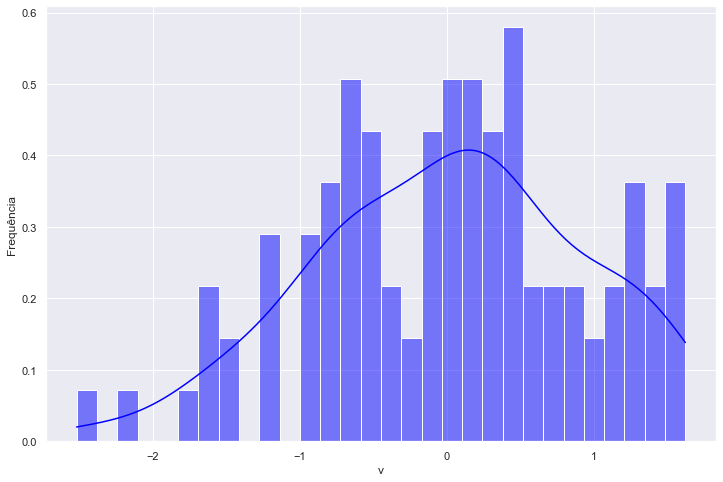

In [31]:
# plot da distribuição de v
sns.set(rc={'figure.figsize':(12,8)});
ax = sns.histplot(v,
                  bins=30,
                  kde=True,
                  color='blue',
                  stat = "density");
ax.set(xlabel='v', ylabel='Frequência');

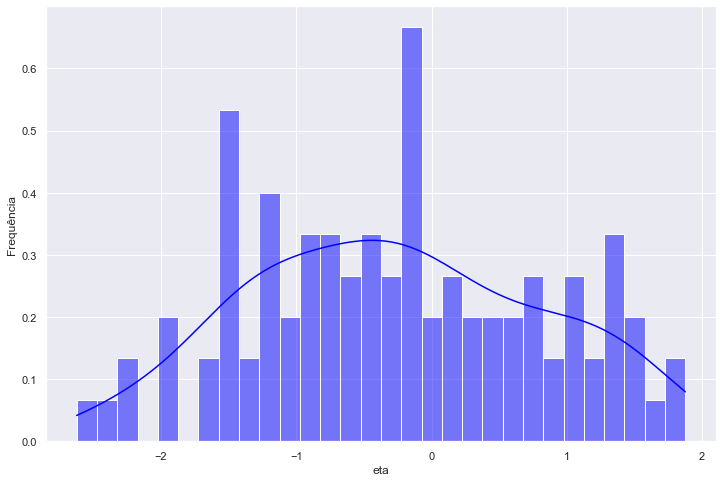

In [32]:
# plot da distribuição de eta
sns.set(rc={'figure.figsize':(12,8)});
ax = sns.histplot(eta,
                  bins=30,
                  kde=True,
                  color='blue',
                  stat = "density");
ax.set(xlabel='eta', ylabel='Frequência');

In [33]:
# matriz de covariância entre v e eta
np.cov(v, eta)

array([[ 0.82915091, -0.00836727],
       [-0.00836727,  1.14491894]])

onde os valores assintóticos devem ser

$$
\mathbb{V}[v] = 1 \\
\mathbb{V}[\eta] = 1 \\
\mathbb{C}[v, \eta] = \mathbb{C}[\eta, v] = 0 \\
$$

In [34]:
# criando u genérico
u = np.zeros(100)

$$
u_i = \lambda v_i + \eta_i
$$

In [35]:
# definindo u
for i in range(n):
    u[i] = lambdaa*v[i] + eta[i]

In [36]:
# matriz de covariância entre u e v
np.cov(u, v)

array([[1.3438394 , 0.40620819],
       [0.40620819, 0.82915091]])

onde a teoria nos diz que 

$$
\begin{aligned}
\mathbb{C}[u, v] &= \mathbb{C}[\lambda v + \eta, v]  \\
&= \lambda\mathbb{C}[v, v] + \mathbb{C}[\eta, v] \\
&= \lambda \mathbb{V}[v] + \mathbb{C}[\eta, v] \\
&= 0.5\cdot 1 + 0 = 0.5
\end{aligned}
$$

In [37]:
# gerandos x1
x1 = np.ones(100)

In [38]:
# gerando x2, x3
mean = [0, 0]
cov = [[1, 0.5], [0.5, 1]]

x2, x3 = np.random.multivariate_normal(mean, cov, 100).T

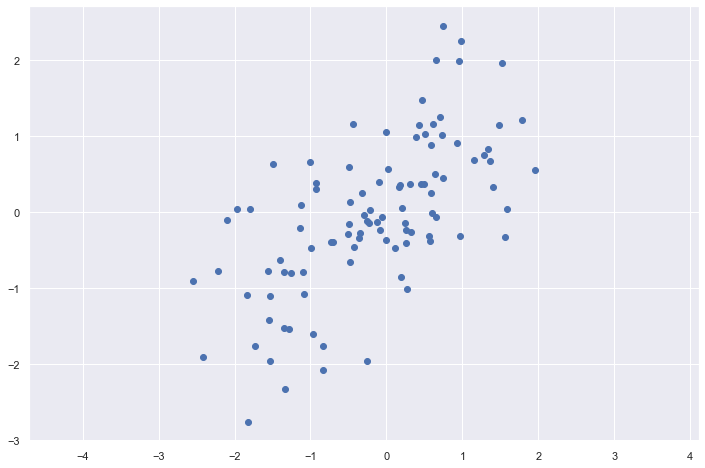

In [39]:
# densidade conjunta de x2 e x3
plt.plot(x2, x3, 'o')
plt.axis('equal')
plt.show()

In [40]:
np.cov(x2,x3)

array([[1.08720474, 0.67618756],
       [0.67618756, 1.02201817]])

$$
y_{2 i}=\pi_1 x_{1 i}+\pi_2 x_{2 i}+\pi_3 x_{3 i}+v_i
$$

In [41]:
# definindo y2
y2 = np.zeros(100)

for i in range(n):
    y2[i] = pi_1*x1[i] + pi_2*x2[i] + pi_3*x3[i] + v[i]

$$
y_{1 i}^*=\gamma y_{2 i}+\beta_1 x_{1 i}+\beta_2 x_{2 i}+u_i
$$

In [42]:
# definindo y1*
y1_star = np.zeros(100)

for i in range(n):
    y1_star[i] = gamma*y2[i] + beta_1*x1[i] + beta_2*x2[i] + u[i]

$$
y_{1 i}=\mathbb{I}\left(y_{1 i}^*>0\right)
$$

In [43]:
# definindo y1
y1 = np.zeros(100)

for i in range(n):
    if y1_star[i] > 0:
        y1[i] = 1
    else:
        y1[i] = 0

### (b) (1.4) Considerando o processo de geração de dados descrito acima, simule uma amostra de tamanho $n$ e implemente a estimação solicitada no item (a). Obtenha as estimativas dos parâmetros $\left(\gamma, \beta_1, \beta_2, \pi_1, \pi_2, \pi_3\right)$ e intervalos de confiança de $95 \%$ via bootstrap.

Agora precisamos montar a log-likelihood, que é

$$
\begin{aligned}
\ln(\mathcal{L}) &= \sum_{i=1}^n \ln\left[f(y_{1 i}, y_{2 i}| x_i)\right]\\
&= \sum_{i=1}^n y_{1 i}\ln\left[\Phi(w)\right] + (1-y_{1 i})\ln\left[1-\Phi(w)\right] - \frac{1}{2}\ln\left[\sigma_v^2\right] -\left(\frac{\left(y_{2 i} - \left(\pi_1 x_{1 i}+\pi_2 x_{2 i}+\pi_3 x_{3 i}\right)\right)^2}{2\sigma_v^2}\right)
\end{aligned}
$$

onde $w = \frac{(\gamma+\lambda) y_{2 i}+(\beta_1-\lambda\pi_1) x_{1 i}+(\beta_2-\lambda\pi_2) x_{2 i}-\lambda\pi_3 x_{3 i}}{\sigma_u^2 - \lambda^2\sigma_v^2}$

Para diminuir o tempo computacional, vamos vetorizar as variáveis que temos, i.e. $x_1$, $x_2$, $x_3$, $y_1$ e $y_3$.

In [44]:
df = pd.DataFrame({'x1':x1, 'x2':x2, 'x3':x3, 'y1':y1, 'y2':y2})

In [45]:
df

,x1,x2,x3,y1,y2
0,1.0,-0.488634,0.596601,1.0,0.602780
1,1.0,-0.480415,0.140387,0.0,-0.338661
2,1.0,-0.012455,1.055330,0.0,0.513075
3,1.0,-0.505522,-0.285600,1.0,0.339864
4,1.0,0.951116,1.983426,0.0,1.472169
...,...,...,...,...,...
95,1.0,-1.724489,-1.765776,0.0,-3.983017
96,1.0,-1.132667,-0.210457,1.0,0.064791
97,1.0,1.483936,1.144480,0.0,1.392514
98,1.0,1.277926,0.756227,1.0,2.343064


In [46]:
def mle(parametros, x1, x2, x3, y1, y2):
   gamma, beta_1, beta_2, pi_1, pi_2, pi_3 = parametros # parametros (são os outputs futuros do problema de otimização)
   # vamos iterar a pdf de cada amostra
   LL = 0
   sigma2_v = 1
   sigma2_u = 1.25
   lambdaa = 0.5
   w = np.zeros(100)
   for i in range(100):
      w[i] = ( ( gamma + lambdaa ) * y2[i] + ( beta_1 - lambdaa*pi_1 ) * x1[i] + \
          ( beta_2 - lambdaa*pi_2 ) * x2[i] - lambdaa * pi_3 * x3[i] ) / ( sigma2_u - ( lambdaa**(2) ) * sigma2_v ) 
      if norm.cdf(w[i]) == 0:
        ln_pdf_i = 0
      else:
        ln_pdf_i = y1[i] * np.log( norm.cdf( w[i] ) ) + ( 1 - y1[i] ) * np.log( 1 - norm.cdf( w[i] ) ) \
          - (1/2) * np.log( sigma2_v ) - ( ( y2[i] - ( pi_1 * x1[i] + pi_2 * x2[i] + pi_3 * x3[i] ) )**2 / ( 2 * sigma2_v ) ) 
      LL = LL + ln_pdf_i
   # Calcula o negativo da log-likelihood
   neg_LL = -LL
   return neg_LL

In [47]:
# função de otimização
def estimadores(x1, x2, x3, y1, y2, chute_inicial):
    """
    Calcula os valores que minimiza a função de verossimilhançaa dada a amostra
    :param x: valores de x da amostra de tamanho n
    :param y: valores de y da amostra de tamanho n
    :param chute_inicial: chute inicial na forma (gamma, beta_1, beta_2, pi_1, pi_2, pi_3)
    :return: tupla com os valores ótimos (gamma, beta_1, beta_2, pi_1, pi_2, pi_3)
    """
    estimadores_mle = minimize(mle,
        x0=chute_inicial,
        args=(x1, x2, x3, y1, y2),
        bounds=((None, None), (None, None), (None, None), (None, None), (None, None), (None, None)),
        method = 'L-BFGS-B'
        ).x
    return estimadores_mle

Esses são os resultados estimados respectivamente de, $\hat{\gamma}$, $\hat{\beta}_1$, $\hat{\beta}_2$, $\hat{\pi}_1$, $\hat{\pi}_2$ e $\hat{\pi}_3$.

In [48]:
chute = [0, 0, 0, 0, 0, 0]
estimadores(x1, x2, x3, y1, y2, chute)

array([ 1.20917455, -0.20415296, -1.3954278 ,  0.0183129 ,  1.09208889,
        0.79526807])

Os resultados esperados eram $\gamma=1$, $\beta_1=0$, $\beta_2=-1$, $\pi_1=0$, $\pi_2=1$ e $\pi_3=1$

Agora vamos fazer a estimação via Bootstrap, com 1000 reamostragens.

In [49]:
# gerando matrizes nulas para o procedimento de bootstrap
Bootstrap_x1 = np.zeros((1000, 100))
Bootstrap_x2 = np.zeros((1000, 100))
Bootstrap_x3 = np.zeros((1000, 100))
Bootstrap_y1 = np.zeros((1000, 100))
Bootstrap_y2 = np.zeros((1000, 100))

estimadores_mle = np.zeros((1000, 6))

In [50]:
# Bootstrap
# demora > 60 minutos pra rodar quando a reamostragem é em 1000
index = np.arange(0, 100)       # criando um vetor de índices de 1 à 100

# NÃO SE ESQUEÇA DE MUDAR O NÚMERO DE REAMOSTRAGEM PARA 1000
for i in range(100):          
    random_index = np.random.choice(index, replace = True, size = 100)      # escolhe um índice do vetor de índices aleatóriamente, com reposição, 100 vezes
    for j in range(100):
        Bootstrap_x1[i][j] = x1[random_index[j]]
        Bootstrap_x2[i][j] = x2[random_index[j]]
        Bootstrap_x3[i][j] = x3[random_index[j]]
        Bootstrap_y1[i][j] = y1[random_index[j]]
        Bootstrap_y2[i][j] = y2[random_index[j]]
    estimadores_mle[[i]] = estimadores( Bootstrap_x1[i],
                                        Bootstrap_x2[i],
                                        Bootstrap_x3[i],
                                        Bootstrap_y1[i],
                                        Bootstrap_y2[i],
                                        [0, 0, 0, 0, 0, 0])
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [51]:
# função de intervalo de confiança
def intervalo_de_confianca(data, confianca=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, dp = np.mean(a), stats.sem(a)
    h = dp * stats.t.ppf((1 + confianca) / 2., n-1)
    return m-h, m+h

In [52]:
# Tabela com os estimadores de mle de Bootstrap
beta_bootstrap_mle_normal = pd.DataFrame([[np.mean(estimadores_mle[:,0]), np.median(estimadores_mle[:,0]), np.var(estimadores_mle[:,0]), np.max(estimadores_mle[:,0]), np.min(estimadores_mle[:,0]), intervalo_de_confianca(estimadores_mle[:,0])[0], intervalo_de_confianca(estimadores_mle[:,0])[1]],
                                          [np.mean(estimadores_mle[:,1]), np.median(estimadores_mle[:,1]), np.var(estimadores_mle[:,1]), np.max(estimadores_mle[:,1]), np.min(estimadores_mle[:,1]), intervalo_de_confianca(estimadores_mle[:,1])[0], intervalo_de_confianca(estimadores_mle[:,1])[1]],
                                          [np.mean(estimadores_mle[:,2]), np.median(estimadores_mle[:,2]), np.var(estimadores_mle[:,2]), np.max(estimadores_mle[:,2]), np.min(estimadores_mle[:,2]), intervalo_de_confianca(estimadores_mle[:,2])[0], intervalo_de_confianca(estimadores_mle[:,2])[1]],
                                          [np.mean(estimadores_mle[:,3]), np.median(estimadores_mle[:,3]), np.var(estimadores_mle[:,3]), np.max(estimadores_mle[:,3]), np.min(estimadores_mle[:,3]), intervalo_de_confianca(estimadores_mle[:,3])[0], intervalo_de_confianca(estimadores_mle[:,3])[1]],
                                          [np.mean(estimadores_mle[:,4]), np.median(estimadores_mle[:,4]), np.var(estimadores_mle[:,4]), np.max(estimadores_mle[:,4]), np.min(estimadores_mle[:,4]), intervalo_de_confianca(estimadores_mle[:,4])[0], intervalo_de_confianca(estimadores_mle[:,4])[1]],
                                          [np.mean(estimadores_mle[:,5]), np.median(estimadores_mle[:,5]), np.var(estimadores_mle[:,5]), np.max(estimadores_mle[:,5]), np.min(estimadores_mle[:,5]), intervalo_de_confianca(estimadores_mle[:,5])[0], intervalo_de_confianca(estimadores_mle[:,5])[1]]],
                                        columns=['Média', 'Mediana', 'Variância', 'Máximo', 'Mínimo', 'IC Inferior', 'IC Superior'], 
                                        index=['γ', 'β_1', 'β_2', 'π_1', 'π_2', 'π_3'])
beta_bootstrap_mle_normal

,Média,Mediana,Variância,Máximo,Mínimo,IC Inferior,IC Superior
γ,0.128121,0.0,0.154374,2.107692,0.000000,0.103727,0.152515
β_1,-0.025730,0.0,0.010256,0.192327,-0.841946,-0.032018,-0.019443
β_2,-0.151334,0.0,0.228288,0.000000,-2.979185,-0.180998,-0.121670
π_1,0.000700,0.0,0.000817,0.247543,-0.204175,-0.001075,0.002474
π_1,0.107104,0.0,0.104964,1.341671,0.000000,0.086989,0.127218
π_1,0.080133,0.0,0.059575,1.094627,0.000000,0.064979,0.095287


Os resultados esperados eram $\gamma=1$, $\beta_1=0$, $\beta_2=-1$, $\pi_1=0$, $\pi_2=1$ e $\pi_3=1$

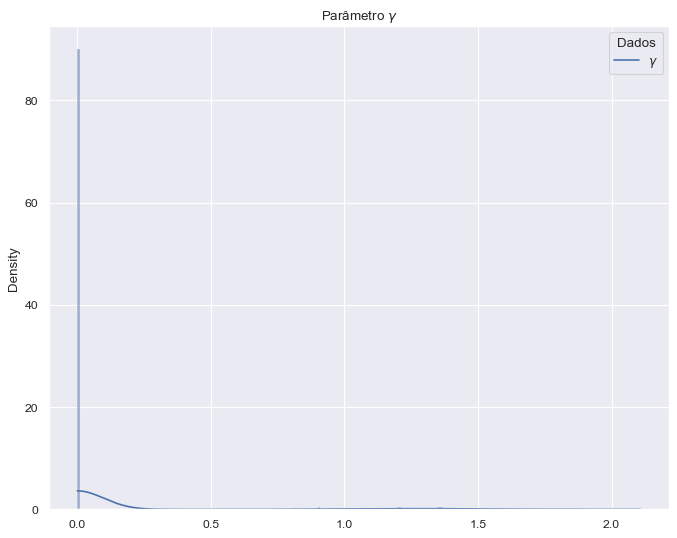

In [53]:
# Plots
plt.figure(figsize=(10, 8), dpi=80)
sns.histplot((estimadores_mle[:,0]), kde=True, binwidth=0.01, stat='density').set_title('Parâmetro $γ$')
plt.legend(title='Dados', loc='upper right', labels=['$γ$'])

$\gamma=1$

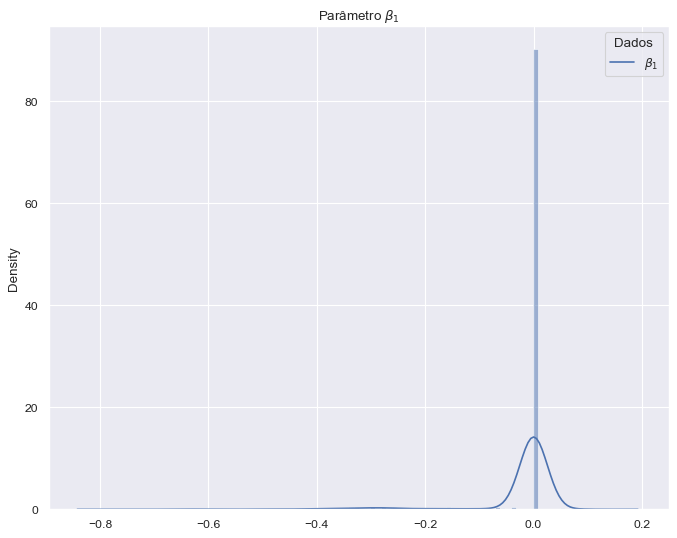

In [54]:
# Plots
plt.figure(figsize=(10, 8), dpi=80)
sns.histplot((estimadores_mle[:,1]), kde=True, binwidth=0.01, stat='density').set_title('Parâmetro $β_1$')
plt.legend(title='Dados', loc='upper right', labels=['$β_1$'])

$\beta_1=0$

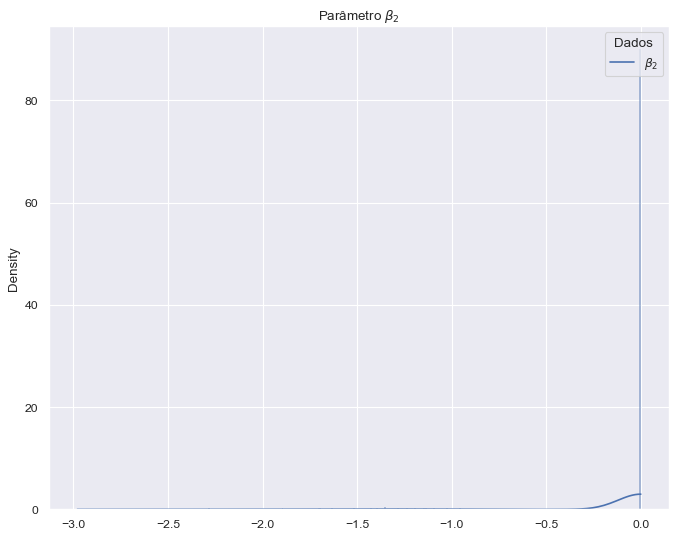

In [55]:
# Plots
plt.figure(figsize=(10, 8), dpi=80)
sns.histplot((estimadores_mle[:,2]), kde=True, binwidth=0.01, stat='density').set_title('Parâmetro $β_2$')
plt.legend(title='Dados', loc='upper right', labels=['$β_2$'])

$\beta_2=-1$

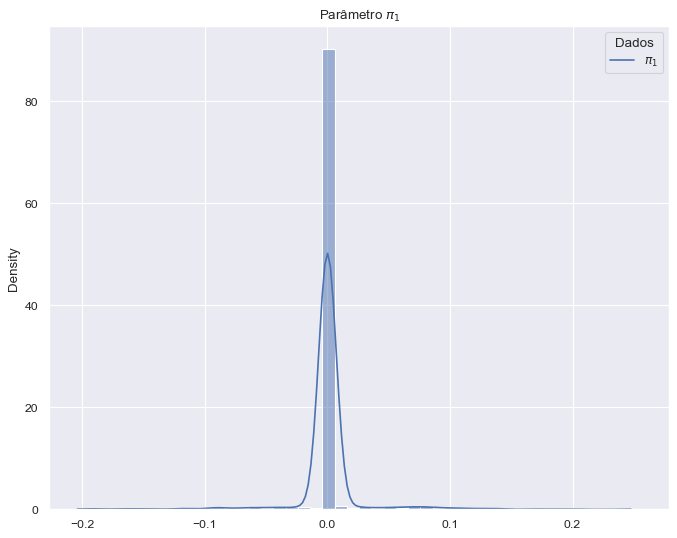

In [56]:
# Plots
plt.figure(figsize=(10, 8), dpi=80)
sns.histplot((estimadores_mle[:,3]), kde=True, binwidth=0.01, stat='density').set_title('Parâmetro $π_1$')
plt.legend(title='Dados', loc='upper right', labels=['$π_1$'])

$\pi_1=0$

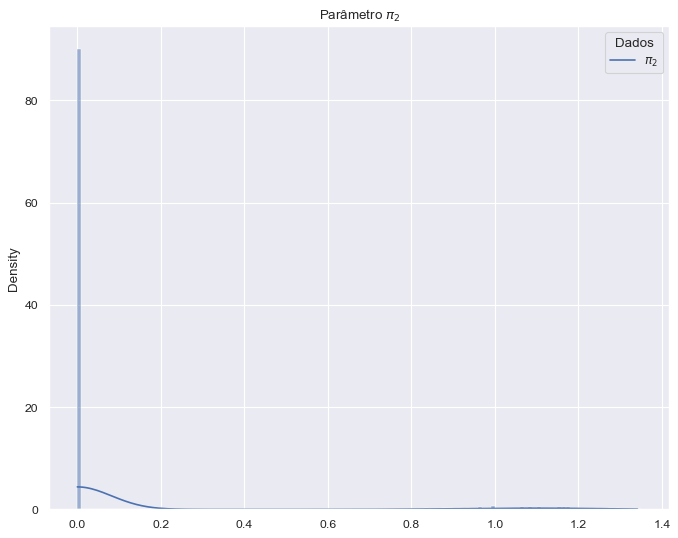

In [57]:
# Plots
plt.figure(figsize=(10, 8), dpi=80)
sns.histplot((estimadores_mle[:,4]), kde=True, binwidth=0.01, stat='density').set_title('Parâmetro $π_2$')
plt.legend(title='Dados', loc='upper right', labels=['$π_2$'])

$\pi_2=1$

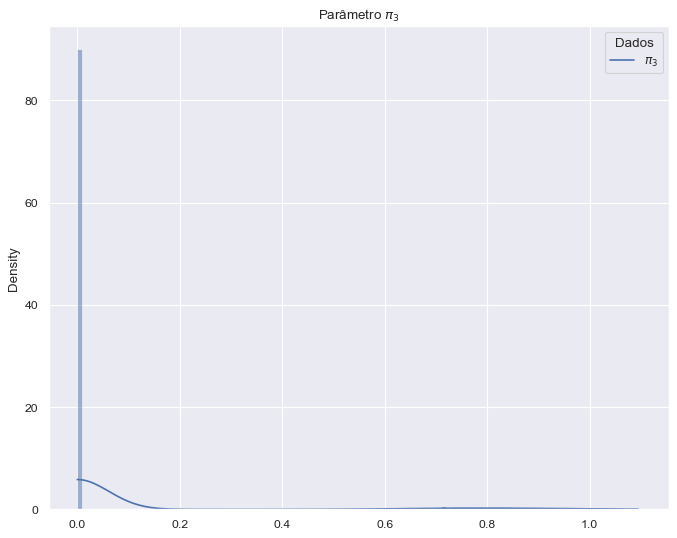

In [58]:
# Plots
plt.figure(figsize=(10, 8), dpi=80)
sns.histplot((estimadores_mle[:,5]), kde=True, binwidth=0.01, stat='density').set_title('Parâmetro $π_3$')
plt.legend(title='Dados', loc='upper right', labels=['$π_3$'])

$\pi_3=1$

### (c) (1.0) Proponha um método de estimação alternativo em dois passos, que permita testar a hipótese de endogeneidade no modelo. Descreva o método de estimação e, se houver, a função de verossimilhança.

Rivers and Vuong (JoE 1988) oferecem um método alternativo ao anterior que consiste em dois passos:

- OLS de $y_2$ em $x1$, $x_2$ e $x_3$, e extrair os resíduos $\hat{v}$
- Probit de $y_1$ em $y_2$, $x_1$, $x_2$ e $\hat{v}$

$H_0$ : $\xi = 0$ é um teste simples para endogeneidade, onde $\xi$ é o coeficiente de $v$ no segundo estágio.

O primeiro passo consiste em encontrar as seguintes estimativas
$$
y_{2 i}=\pi_1 x_{1 i}+\pi_2 x_{2 i}+\pi_3 x_{3 i}+v_i
$$

In [60]:
ols = pd.DataFrame()

ols['y'] = df['y2']
ols['x1'] = df['x1']
ols['x2'] = df['x2']
ols['x3'] = df['x3']

result = sm.ols(formula="y ~ x1 + x2 + x3", data=ols).fit()

In [61]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     188.4
Date:                Wed, 14 Dec 2022   Prob (F-statistic):           3.89e-34
Time:                        18:27:44   Log-Likelihood:                -130.60
No. Observations:                 100   AIC:                             267.2
Df Residuals:                      97   BIC:                             275.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0087      0.046      0.188      0.8

In [63]:
df['v_chapeu'] = result.resid

$$
\begin{aligned}
& h\left(y_i, Y_i \mid X_i ; \gamma, \beta, \lambda, I I, \Sigma_{v v}\right) \\
& =f\left(y_i \mid Y_i X_i ; \gamma, \beta, \lambda, \Pi\right) g\left(Y_i \mid X_i ; \Pi, \Sigma_{v v}\right),
\end{aligned}
$$

$$
\begin{aligned}
& f\left(y_i \mid Y_i X_i ; \gamma, \beta, \lambda, \Pi\right) \\
& =\Phi\left(Y_i^{\prime} \gamma+X_{1 i}^{\prime} \beta+V_i^{\prime} \lambda\right)^{y_y}\left[1-\Phi\left(Y_i^{\prime} \gamma+X_{1 i}^{\prime} \beta+V_i^{\prime} \lambda\right)\right]^{1-y} \\
& g\left(Y_i \mid X_i ; \Pi, \Sigma_{\nu v}\right) \\
& =(2 \pi)^{-m / 2}\left|\Sigma_{\nu v}\right|^{-1 / 2} \exp \left\{-1 / 2\left(Y_i-\Pi^{\prime} X_i\right)^{\prime} \Sigma_{v v}^{-1}\left(Y_i-\Pi^{\prime} X_i\right)\right\}
\end{aligned}
$$